<font size=7> First analysis - Drug Dataset

# Set up Notebook

import stuff

In [ ]:
from human_hip import spike_data
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch



load data

In [ ]:
sd = spike_data.read_autocurated_data("/workspaces/elliott_midbrain/midbrain/data24578_SmitsMO_D62_sect300_NBQXCPP_175-DIV8_20241114_acqm.zip")

# First look 

In [4]:
spike_data.text_summary( sd )

Number of spikes:  85155
Length:  306 seconds
Number of Neurons:  253
Average Firing Rate:  1.1
Coefficient of Variation:  0.743


(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

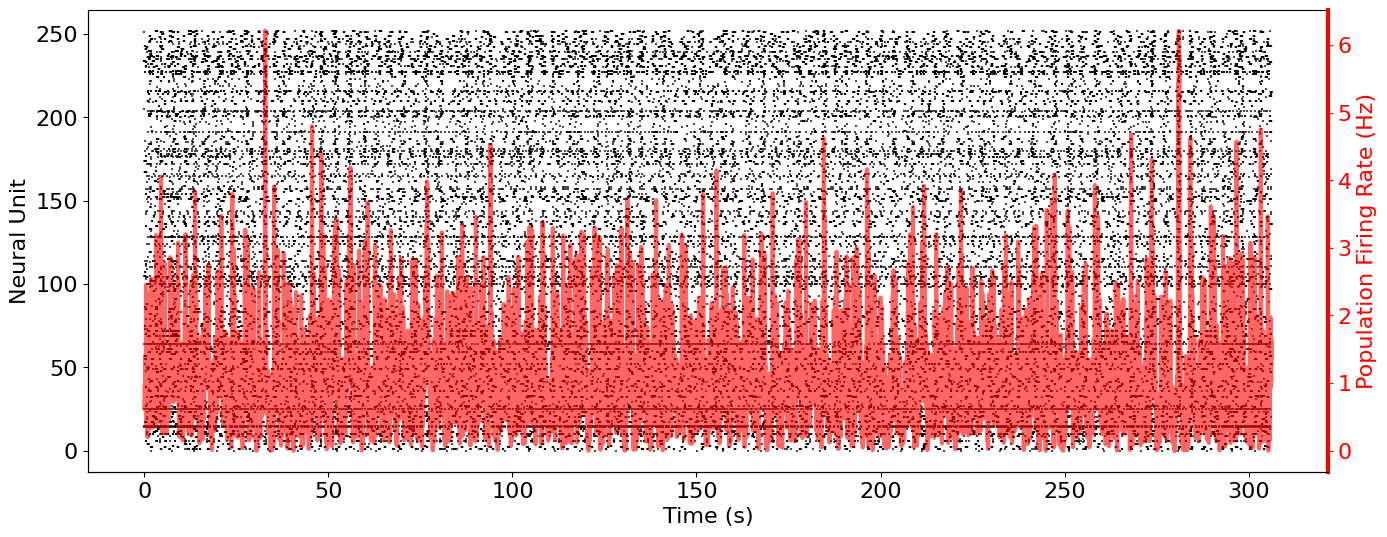

In [5]:
spike_data.plot_raster( sd  )

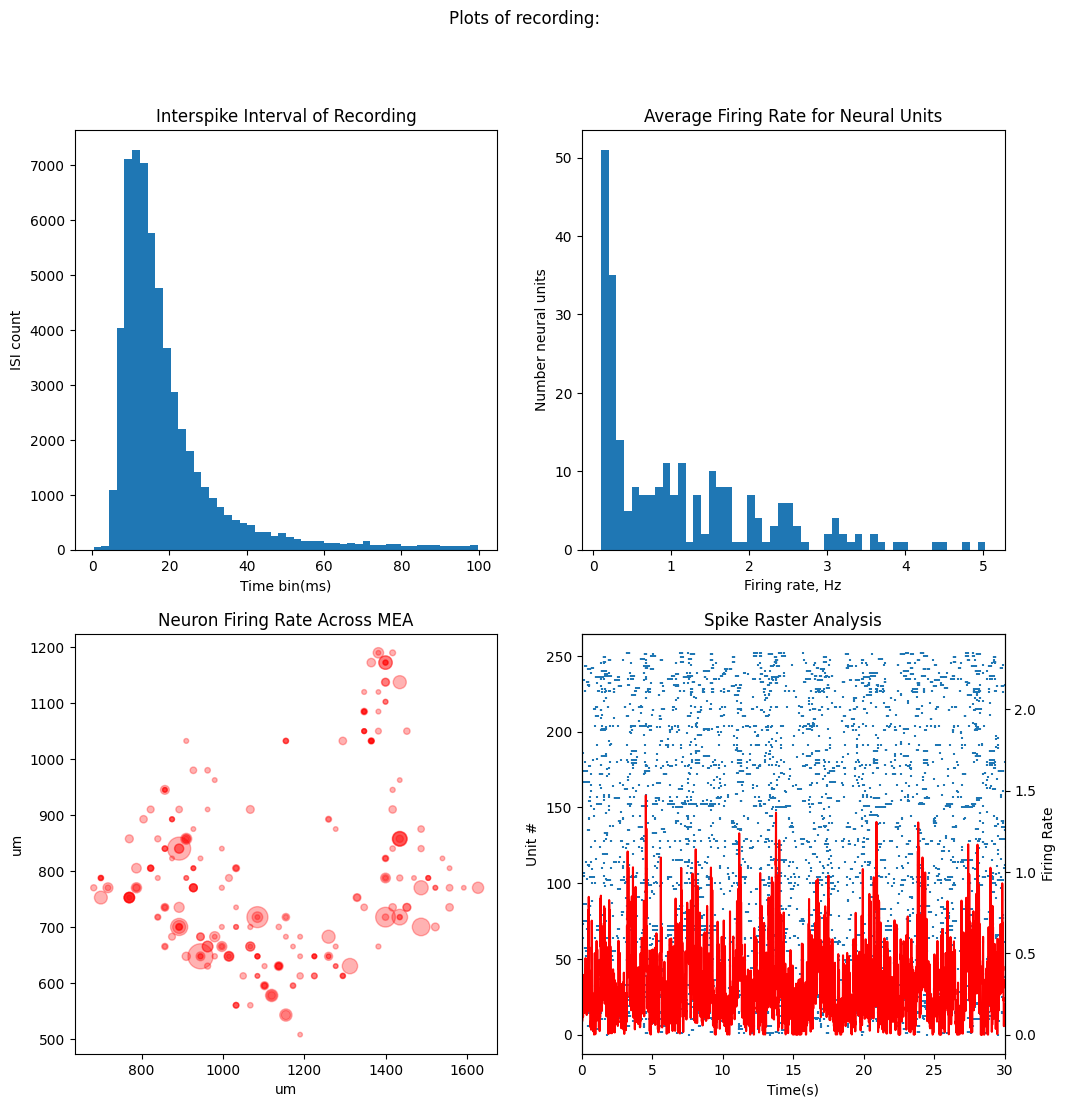

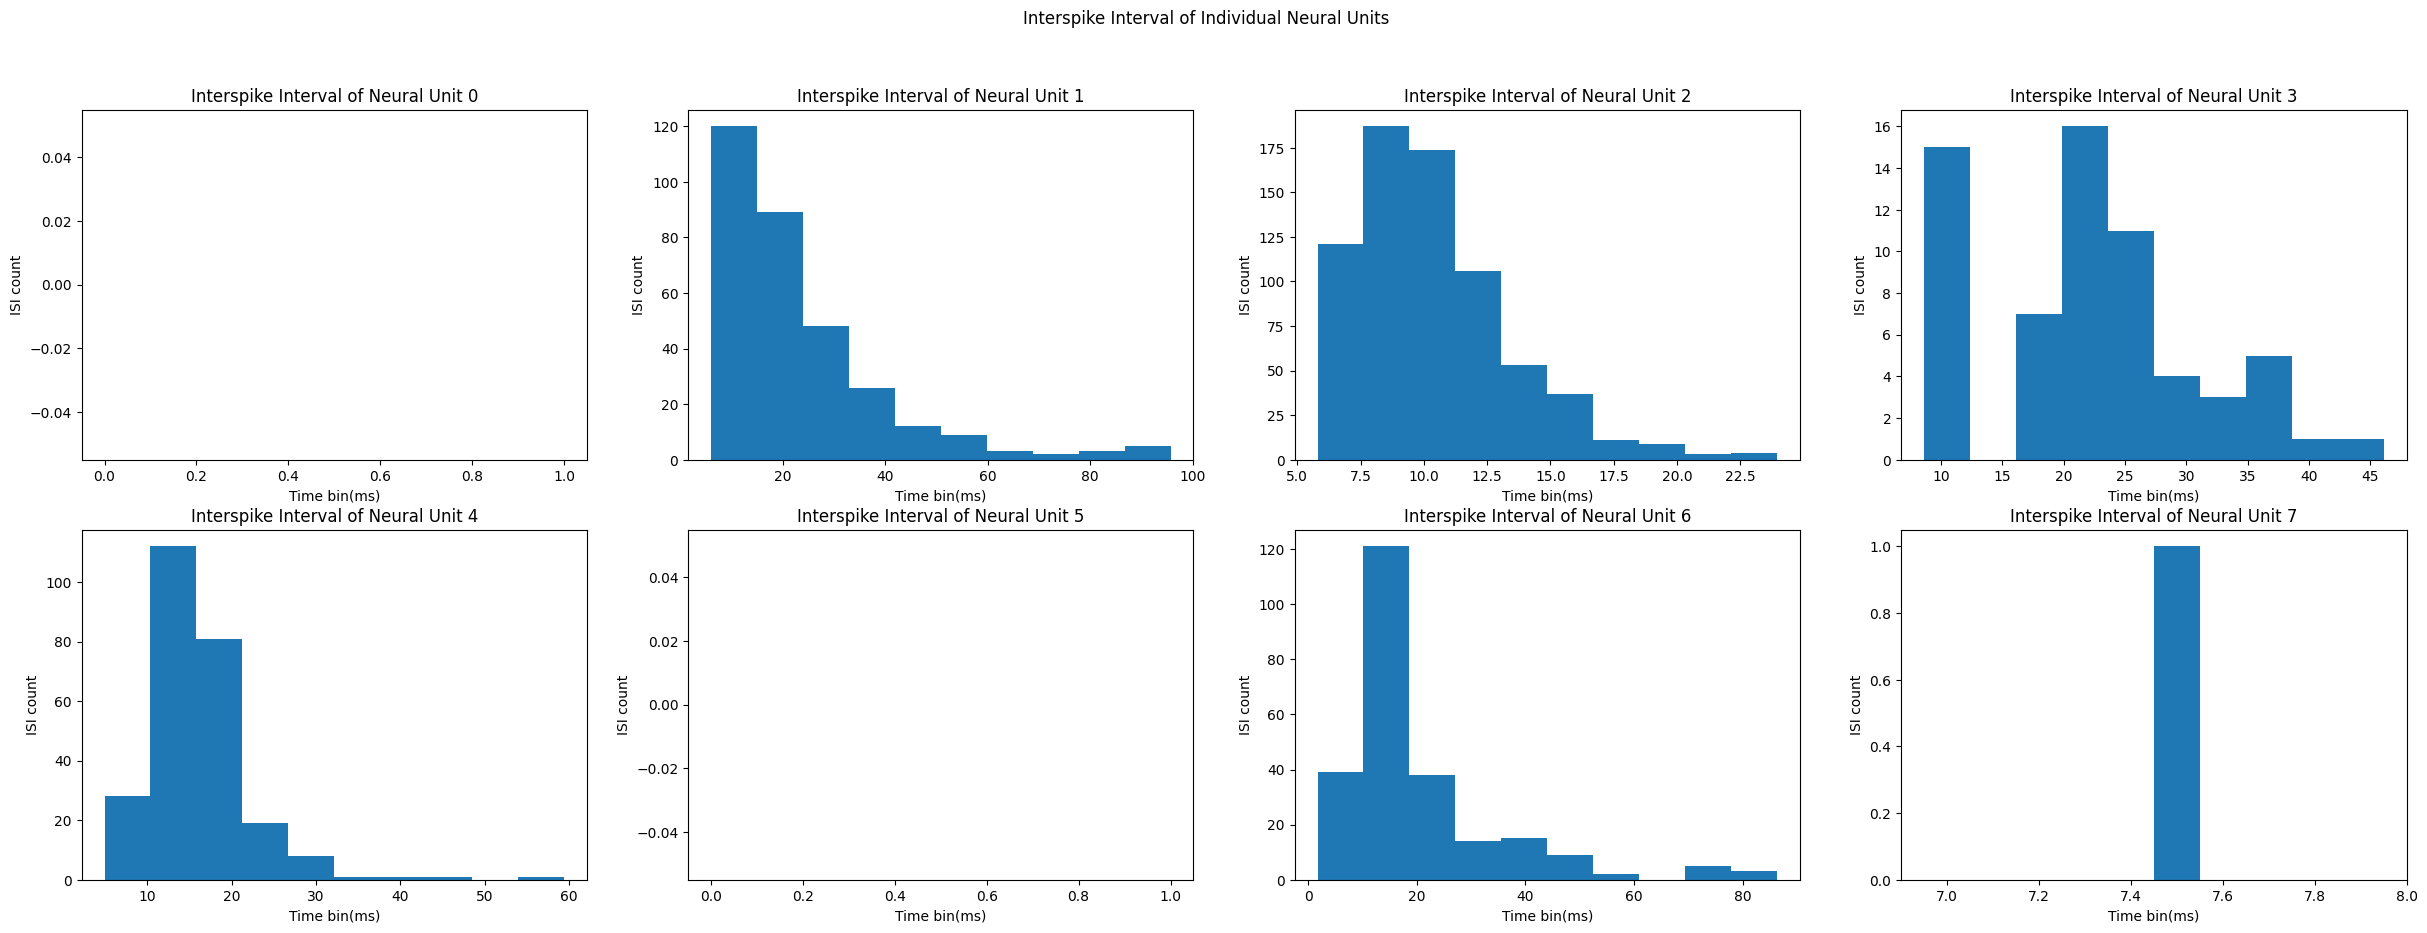

In [6]:
spike_data.plot_summary( sd )

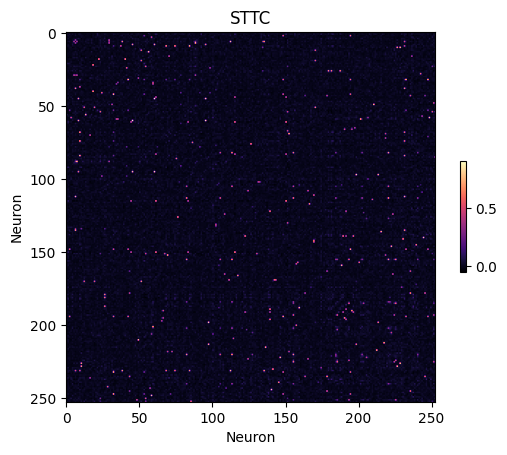

In [7]:
spike_data.plot_sttc_matrix( sd, sttc_cutoff_high=.9 )

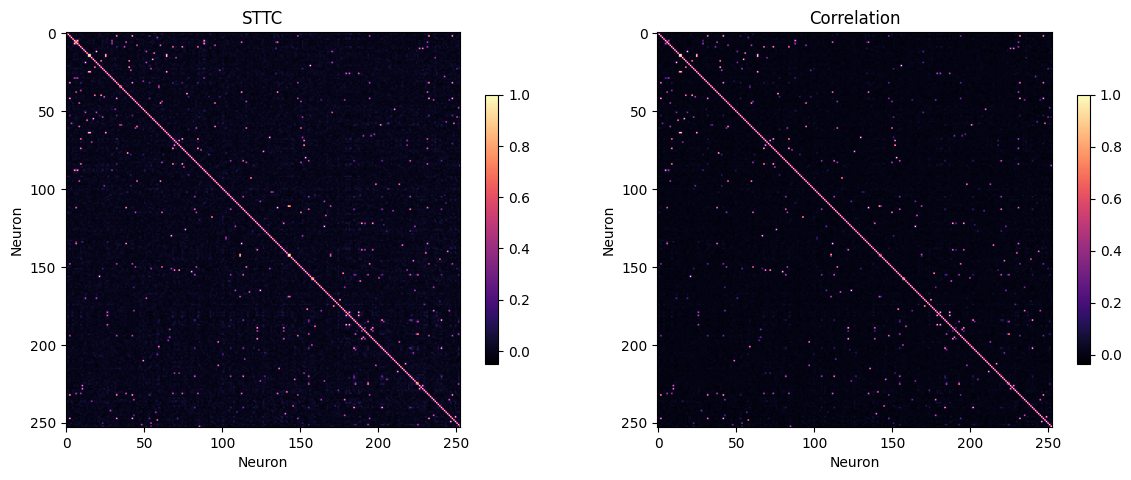

In [8]:
spike_data.plot_matrices_connectivity( sd )

In [21]:
spike_data.plot_sttc_layout

<function human_hip.spike_data.plot_summary.plot_sttc_layout(sd, sttc_threshold=0.1, xlim=None, ylim=None)>

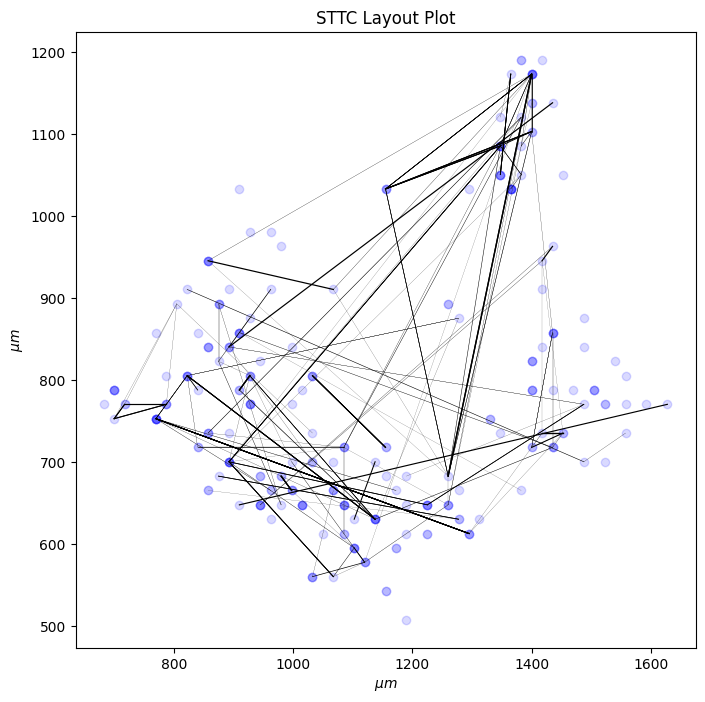

In [22]:
spike_data.plot_sttc_layout(sd)

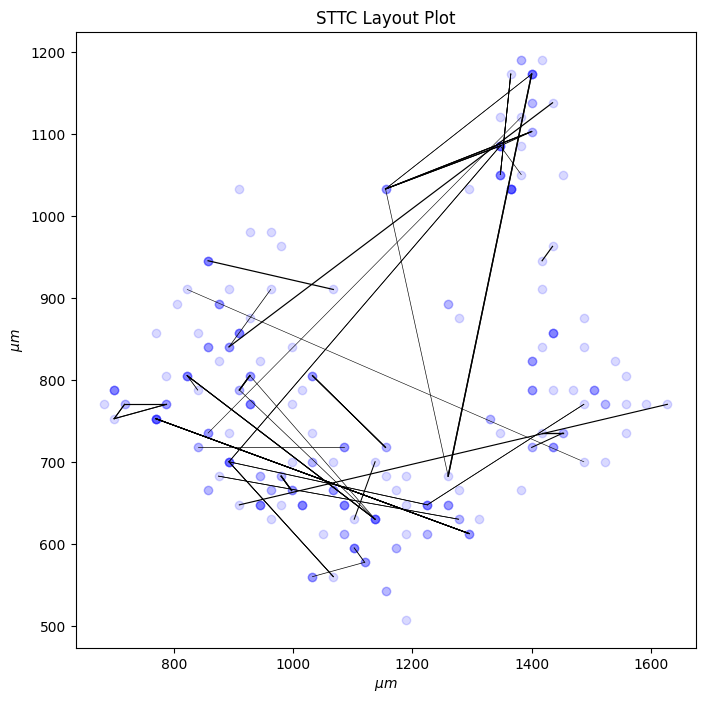

In [43]:
spike_data.plot_sttc_layout(sd, sttc_threshold=0.4)

In [11]:
spike_data.plot_eigendecomposition_vector

<function human_hip.spike_data.plot_eigendecomposition.plot_eigendecomposition_vector(sd, vector_index=0, use_sttc=True, sttc_cutoff_high=1.1, show_sttc=False, show_threshold=0.1, plot_color='magma', xlim=None, ylim=None)>

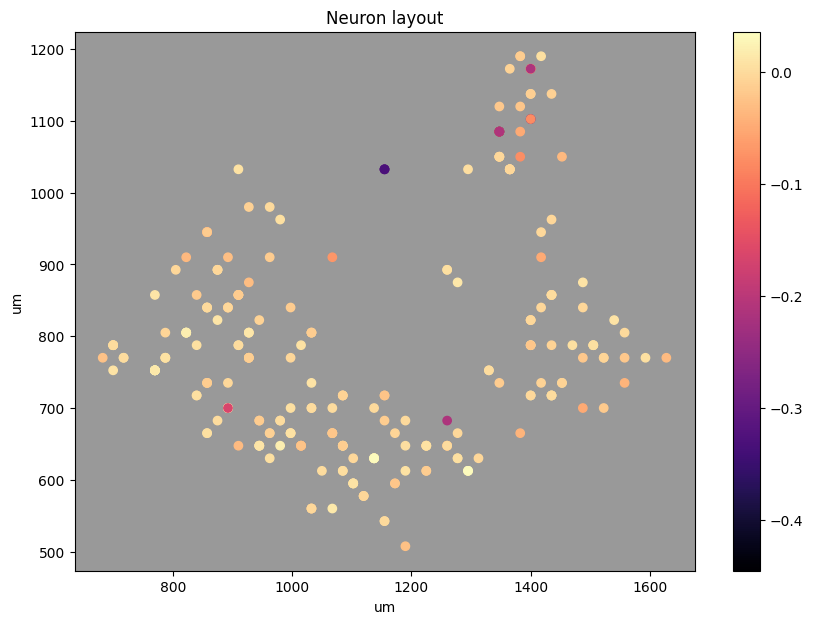

In [12]:
spike_data.plot_eigendecomposition_vector( sd, sttc_cutoff_high=.8 )

# STTC clustering

(array([6.6000e+01, 5.1200e+02, 3.0020e+03, 1.1434e+04, 1.8460e+04,
        1.3234e+04, 8.2200e+03, 4.2800e+03, 1.9500e+03, 8.8800e+02,
        4.4400e+02, 2.8400e+02, 1.7200e+02, 1.2000e+02, 6.2000e+01,
        2.8000e+01, 3.4000e+01, 1.0000e+01, 1.8000e+01, 1.4000e+01,
        1.2000e+01, 0.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00,
        8.0000e+00, 4.0000e+00, 6.0000e+00, 4.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+01, 2.0000e+00, 6.0000e+00, 2.0000e+00,
        6.0000e+00, 1.2000e+01, 6.0000e+00, 6.0000e+00, 8.0000e+00,
        6.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+01, 2.0000e+00, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+01, 1.2000e+01, 8.0000e+00,
        8.0000e+00, 1.2000e+01, 8.0000e+00, 1.4000e+01, 6.0000e+00,
        2.0000e+00, 1.2000e+01, 1.8000e+01, 8.0000e+00, 1.0000e+01,
        1.2000e+01, 6.0000e+00, 6.0000e+00, 6.0000e+00, 1.0000e+01,
        4.0000e+00, 6.0000e+00, 8.0000e+00, 1.00

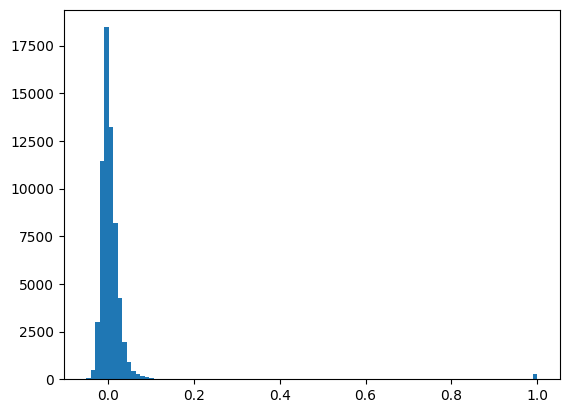

In [3]:
neo = sd.spike_time_tilings()
plt.hist( neo.flatten(), bins=100 )

In [11]:
neo = sd.spike_time_tilings()
sttc_cuttoff = 0.2
neo = np.where( neo<sttc_cuttoff, neo, neo*0 ) #+sttc_cuttoff )

In [12]:
d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering

# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
neo_sorted = neo[ind[::], :][:, ind]
for i in range(neo_sorted.shape[0]):
    neo_sorted[i] = neo_sorted[i][::]


# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
#neo_sorted = neo[ind, :][:, ind]
# for i in range(neo_sorted.shape[0]):
#     neo_sorted[i] = neo_sorted[i][::-1]

    


In [9]:
# ind[::-1]

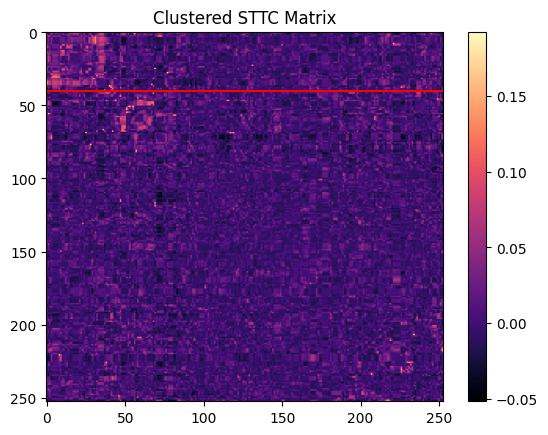

In [14]:
plt.title('Clustered STTC Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()

#plt.axhline(y=40, color='r', linestyle='-')
plt.axhline(y=40, color='r', linestyle='-')

In [31]:
len(ind)

253

In [15]:
neuron_group1 = ind[0:40] #ind[140:]
neuron_group2 = ind[40:250] #ind[60:140]



/tmp/ipykernel_13907/1144708578.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_xy1.append( sd.neuron_data[0][neuron_ind]["position"].tolist() )
/tmp/ipykernel_13907/1144708578.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_xy2.append( sd.neuron_data[0][neuron_ind]["position"].tolist() )


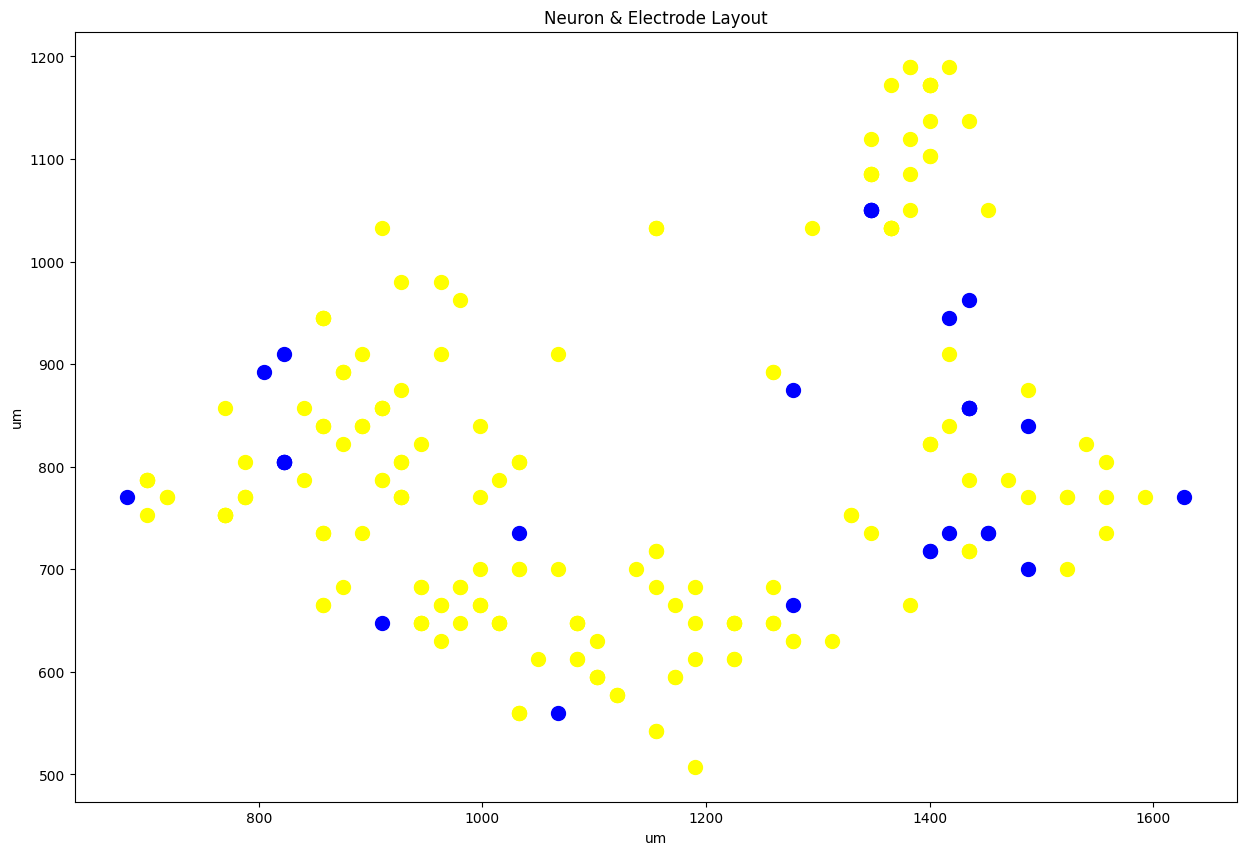

In [17]:
#image_path = "/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png"

# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
#img = plt.imread(image_path)      # Load in image
#plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# Plot electrodes
#plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=10, alpha=.6, c="darkorange")
neuron_xy1 = []
for neuron_ind in neuron_group1:
    neuron_xy1.append( sd.neuron_data[0][neuron_ind]["position"].tolist() )
neuron_xy2 = []
for neuron_ind in neuron_group2:
    neuron_xy2.append( sd.neuron_data[0][neuron_ind]["position"].tolist() )

unique_neuron_xy1 = []
for pair in neuron_xy1:
    if pair not in neuron_xy2:
        unique_neuron_xy1.append(pair)
unique_neuron_xy2 = []
for pair in neuron_xy2:
    if pair not in neuron_xy1:
        unique_neuron_xy2.append(pair)


#for key,val in sd.neuron_data[0].items():
for pair in unique_neuron_xy2 :
    plt.scatter( pair[0], pair[1],  c="yellow", alpha=1, s=100 )  
for pair in unique_neuron_xy1 :
    plt.scatter( pair[0], pair[1],  c="blue", alpha=1, s=100 )  



#plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
#plt.ylim( 0, 1750 )
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
plt.show()  
